In [356]:
# Importing all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import imshow
import time

In [357]:
# Initialize k centers randomly
def initializeRandomCenters(X, k):
    index = np.random.choice(X.shape[0], k, replace=False) 
    return X[index]

In [358]:
%matplotlib inline

def read_img(path):
    img = Image.open(path)
    img_arr = np.array(img, dtype='int32')
    img.close()
    return img_arr

def display_image(arr):
    arr = arr.astype(dtype='uint8')
    img = Image.fromarray(arr, 'RGB')
    imshow(np.asarray(img))
    plt.show()

In [364]:
def k_means_clustering(inputVector, k,
           initialClusterCenters=None):
    if initialClusterCenters is None:
        centroids = initializeRandomCenters(inputVector, k)
    else:
        centroids = initialClusterCenters
    display(centroids)
    hasConverged = False
#initializing array of 0s for clusters
    clusters = np.zeros(len(inputVector))
# initializing temp variable to hold old centers. This will be used later to check the convergence
    centersIMinusOne = centroids
    iteration = 1
    while (not hasConverged):
#         print(iteration)
        centersIMinusOne = centroids
#calculating the euclidean distance using norm function from numpy's linear algebra functions
        noOfDataPoints=len(inputVector)
        
        p2Distances=np.empty((noOfDataPoints,k))
        for i in range(noOfDataPoints):
            p2Distances[i,:]=np.linalg.norm(inputVector[i,:]-centroids,ord=2,axis=1)**2
        clusters = np.argmin(p2Distances, axis=1)

        centroids = np.empty(centroids.shape)
        for j in range(k):
             centroids[j,:]=np.mean(inputVector[clusters==j,:],axis=0)

        hasConverged = np.array_equal(centersIMinusOne,centroids)
        iteration += 1
    print("number of iterations for k = ", k ," is :", iteration)
    return clusters,centroids

starting with center:


array([[  0,   0,   0],
       [255, 255, 255],
       [100, 100, 100],
       [200, 200, 200]])

running for  4  centers


array([[  0,   0,   0],
       [255, 255, 255],
       [100, 100, 100],
       [200, 200, 200]])

number of iterations for k =  4  is : 27
Runtime of the program for  4  centers: {75.21130800247192}
printing the  4  clustered image


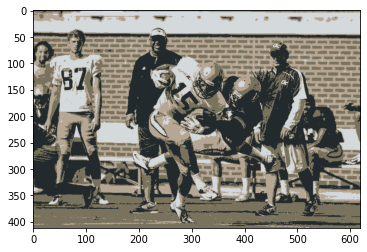

starting with center:


array([[109, 109, 109],
       [110, 110, 110],
       [111, 111, 111],
       [112, 112, 112]])

running for  4  centers


array([[109, 109, 109],
       [110, 110, 110],
       [111, 111, 111],
       [112, 112, 112]])

number of iterations for k =  4  is : 37
Runtime of the program for  4  centers: {103.9819610118866}
printing the  4  clustered image


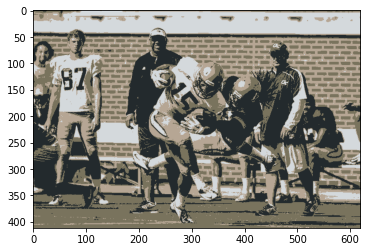

starting with center:


array([[  0,   1,   2],
       [  2,   1,   0],
       [244,   0,   0],
       [255,   0,   0]])

running for  4  centers


array([[  0,   1,   2],
       [  2,   1,   0],
       [244,   0,   0],
       [255,   0,   0]])

number of iterations for k =  4  is : 30
Runtime of the program for  4  centers: {84.03732895851135}
printing the  4  clustered image


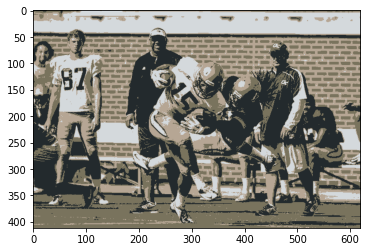

starting with center:


array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

running for  4  centers


array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

number of iterations for k =  4  is : 75
Runtime of the program for  4  centers: {215.10708570480347}
printing the  4  clustered image


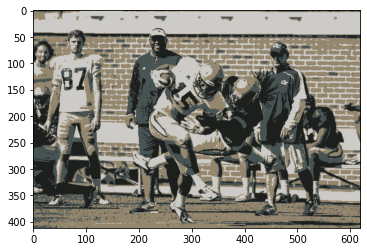

In [365]:
def run_k_means(k,img_arr,centers=None):
    img_reshaped = img_arr.reshape(-1, img_arr.shape[-1])
    r, c, l = img_arr.shape
    print("running for ",k," centers")
    start=time.time()
    labels,centers=k_means_clustering(img_reshaped, k,centers)
    end = time.time()
    print(f"Runtime of the program for ", k," centers:", {end - start})
    ind = np.column_stack((img_reshaped, labels))

    img_clustered = np.array([centers[label] for label in labels])
    img_disp = np.reshape(img_clustered, (r, c, l), order="C")
    print("printing the ",k," clustered image")
    display_image(img_disp)



images=[]
footballImage = "./data/football.bmp"
beachImage = "./data/beach.bmp"
grassImage = "./data/grass.bmp"
images.append(footballImage)
images.append(beachImage)
images.append(grassImage)

for image in images:
    img_arr=read_img(image)
    print("printing the original image")
    display_image(img_arr)
    for k in(2,4,8,16):
        run_k_means(k,img_arr)
        
##
img_arr2=read_img("./data/football.bmp")
centers=[]
centers.append(np.array([[0,0,0],[255,255,255],[100,100,100],[200,200,200]]))
centers.append(np.array([[109,109,109],[110,110,110],[111,111,111],[112,112,112]]))
centers.append(np.array([[0,1,2],[2,1,0],[244,0,0],[255,0,0]]))
centers.append(np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]]))
for center in centers:
    print("starting with center:")
    display(center)
    run_k_means(4,img_arr2,center)